**CUSTOMER SEGMENTATION USING CLUSTERING (K-MEANS ALGORITHM)**

**Importing Necessary Libraries**

1. `import pandas as pd`: Pandas is imported with the alias `pd`, it is a powerful library for data manipulation and analysis in Python, providing data structures and operations for manipulating numerical tables and time series.

2. `import numpy as np`:
NumPy is a powerful Python library for numerical computing, providing support for arrays, matrices, and many mathematical functions to operate on these data structures efficiently.

2. `import matplotlib.pyplot as plt`: Matplotlib is imported with the alias `plt`, it is a plotting library for Python and provides a MATLAB-like interface. `pyplot` is used to create static, animated, and interactive visualizations in Python.

3. `import seaborn as sns`: Seaborn is imported with the alias `sns`, it is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.

4. `from sklearn.preprocessing import StandardScaler`: From the `sklearn.preprocessing` module, the `StandardScaler` class is imported. It is used for standardization of features by removing the mean and scaling to unit variance.

5. `from sklearn.cluster import KMeans`: From the `sklearn.cluster` module, the `KMeans` class is imported. It is an unsupervised learning algorithm used for clustering, which partitions data into `k` clusters based on similarity.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

**Loading the Data**

In [ ]:
# Load the data from the CSV file
file_path = 'Mall_Customers.csv'  # Update with your file path
customer_data = pd.read_csv(file_path)

**Check for Missing Values**

In [ ]:
# Display the first few rows of the dataset
print(customer_data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


**Checking for the null values**

In [ ]:
# Check for missing values
print(customer_data.isnull().sum())

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Getting Descriptive Statistics**

In [ ]:
# Get descriptive statistics
print(customer_data.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


**Visualize the Data**

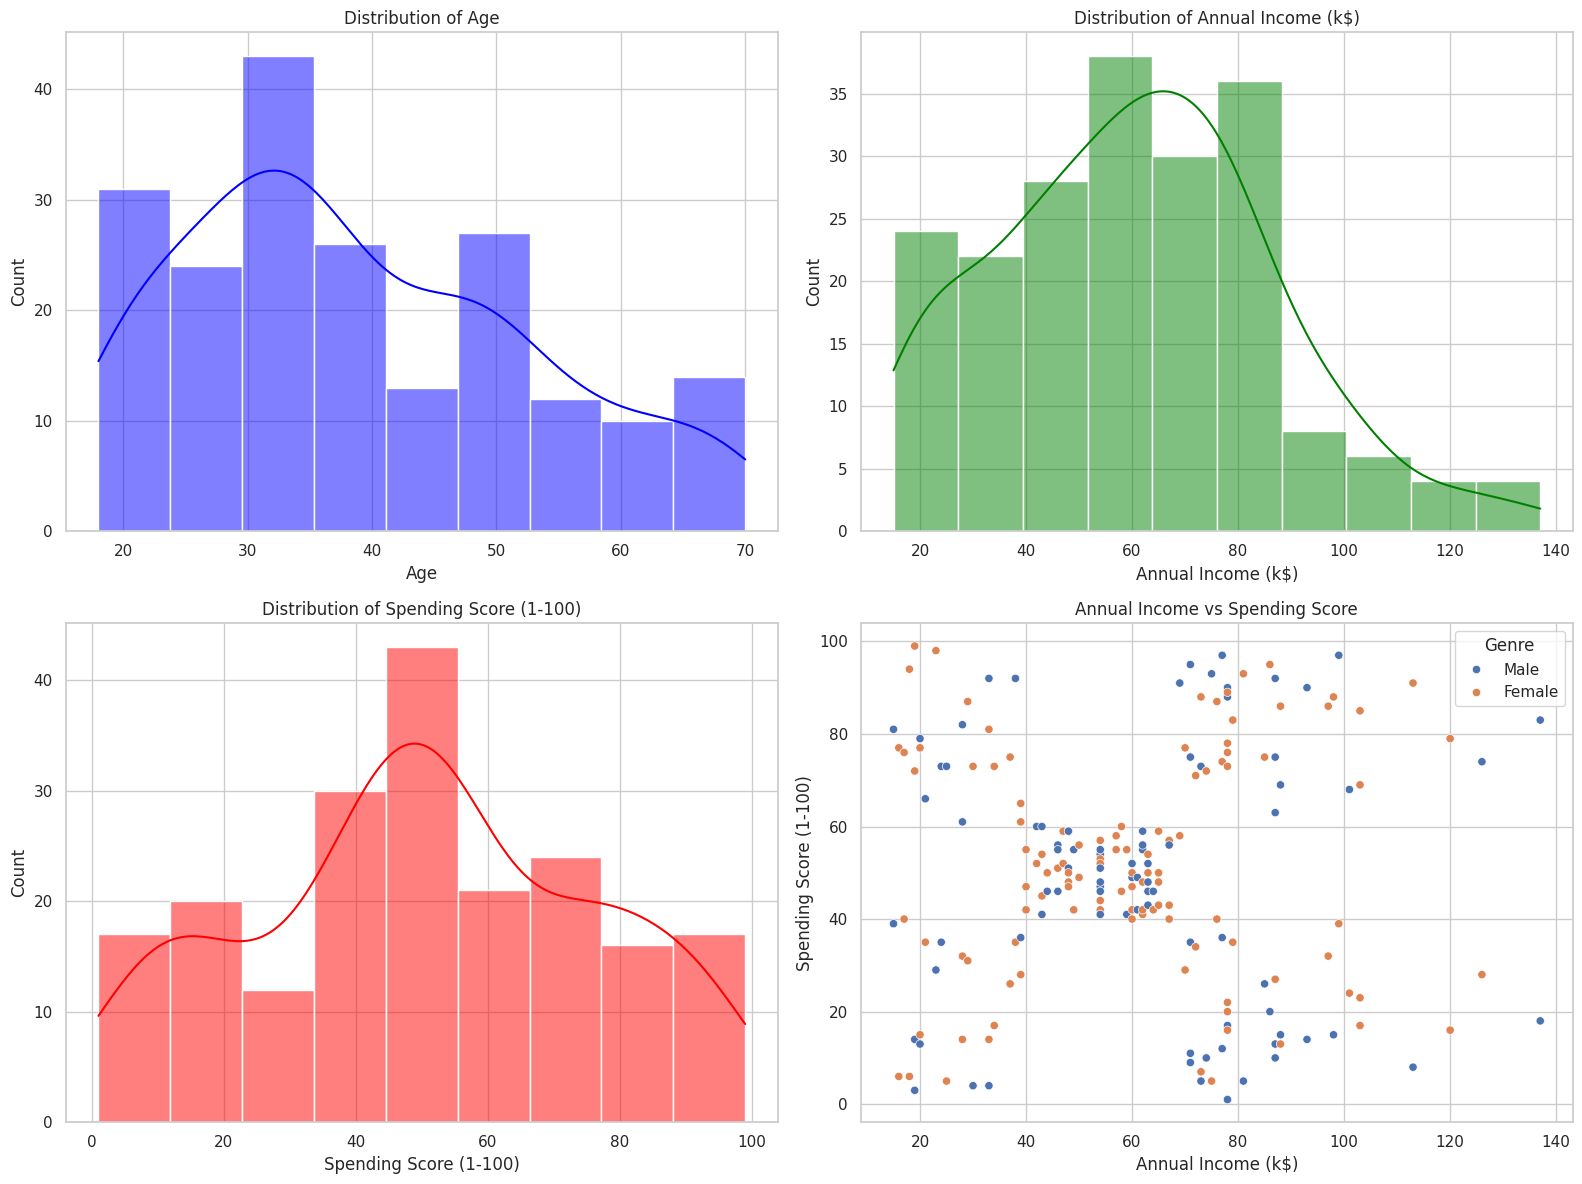

In [ ]:
# Create subplots for visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram for Age
sns.histplot(customer_data['Age'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Age')

# Histogram for Annual Income
sns.histplot(customer_data['Annual Income (k$)'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Annual Income (k$)')

# Histogram for Spending Score
sns.histplot(customer_data['Spending Score (1-100)'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Distribution of Spending Score (1-100)')

# Scatter plot for Annual Income vs Spending Score
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Genre', data=customer_data, ax=axes[1, 1])
axes[1, 1].set_title('Annual Income vs Spending Score')

plt.tight_layout()
plt.show()


1. **Distribution of Age**:
   - This histogram shows the distribution of ages among the customers.
   - The x-axis represents the age groups, and the y-axis represents the frequency or count of customers falling within each age group.
   - The blue curve overlaid on the bars represents the Kernel Density Estimation (KDE) plot, which provides a smoothed representation of the distribution.
   - This plot helps visualize the age distribution of customers in the dataset, giving insights into the age demographics of the customer base.

2. **Distribution of Annual Income**:
   - This histogram illustrates the distribution of annual incomes among the customers.
   - Similar to the previous plot, the x-axis represents different income brackets, and the y-axis represents the frequency or count of customers within each income bracket.
   - The green curve represents the KDE plot, providing a smoothed representation of the distribution.
   - This plot helps in understanding the distribution of income levels among the customers.

3. **Distribution of Spending Score**:
   - This histogram displays the distribution of spending scores among the customers.
   - The x-axis represents the spending score ranges, and the y-axis represents the frequency or count of customers falling within each range.
   - The red curve represents the KDE plot, offering a smoothed view of the distribution.
   - This plot gives insights into the distribution of spending scores among the customer base, indicating how many customers fall within different spending score ranges.

4. **Annual Income vs Spending Score**:
   - This scatter plot visualizes the relationship between annual income and spending score for each customer.
   - Each point on the plot represents a customer, where the x-coordinate represents their annual income, and the y-coordinate represents their spending score.
   - The points are colored based on the gender (Genre) of the customers.
   - This plot helps in understanding if there's any discernible pattern or correlation between the annual income and spending behavior of customers. It can help identify customer segments based on their income and spending habits.

**Standardize the Features**

In [ ]:
# Select features for clustering
features = customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

**Create a Scaler:**

scaler = StandardScaler()
This line creates an instance of the StandardScaler from the scikit-learn library. The StandardScaler is a tool that will help us standardize our features.

**Standardize the Features:**

scaled_features = scaler.fit_transform(features)
In this line, we're using the scaler to standardize the features.

**The fit_transform method does two things:**

**Fit:** It calculates the mean and standard deviation for each feature in the dataset.

**Transform:** It uses these statistics to transform the features so that each feature has a mean of 0 and a standard deviation of 1.

In [ ]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**Determine the Optimal Number of Clusters Using the Elbow Method**

In [ ]:
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

This loop runs the K-Means algorithm for cluster numbers **ranging from 1 to 10.**

**n_clusters=i:** Sets the number of clusters to the current loop index.

**random_state=42:** Ensures reproducibility of the results by fixing the random seed.

**kmeans.fit(scaled_features):** Fits the K-Means algorithm to the standardized features.

**kmeans.inertia_:** Retrieves the WCSS for the current number of clusters and appends it to the wcss list.

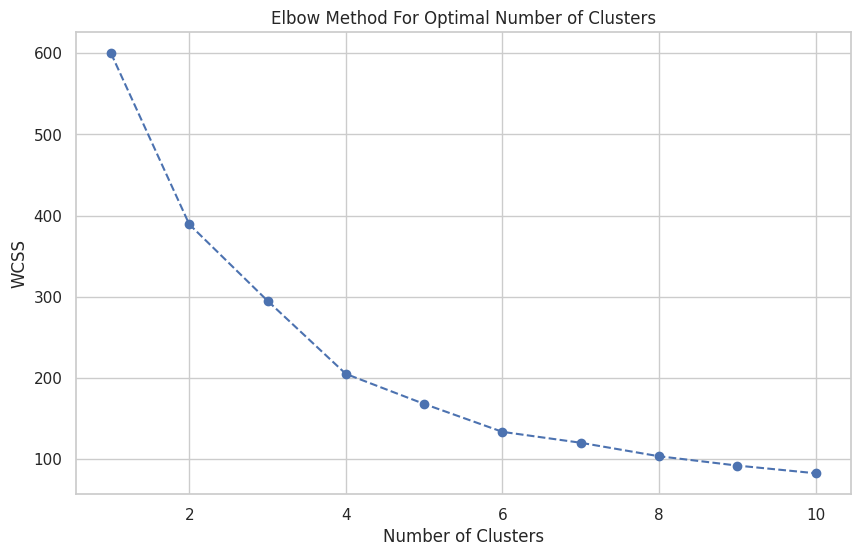

In [ ]:
# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Apply K-means Clustering**

**kmeans = KMeans(n_clusters=5, random_state=42)**

This line creates an instance of the KMeans algorithm.

**n_clusters=5** specifies that we want to divide the data into 5 clusters. This number is chosen based on the Elbow method we discussed earlier.

**random_state=42** ensures that the initial positions of the centroids are the same every time you run the code, making the results reproducible.

**customer_data['Cluster'] = kmeans.fit_predict(scaled_features)**

kmeans.fit_predict(scaled_features) does two things:

**Fit:** It applies the KMeans algorithm to the scaled_features data. This involves finding the best positions for the 5 centroids and assigning each data point to the nearest centroid.

**Predict:**

In [ ]:
# Apply K-means clustering with the chosen number of clusters (e.g., 5 based on the elbow method)
kmeans = KMeans(n_clusters=5, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Display the first few rows of the dataset with cluster labels
print(customer_data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


In [ ]:
print(customer_data.tail())

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
195        1  
196        4  
197        1  
198        4  
199        1  


**Visualize the Clusters**

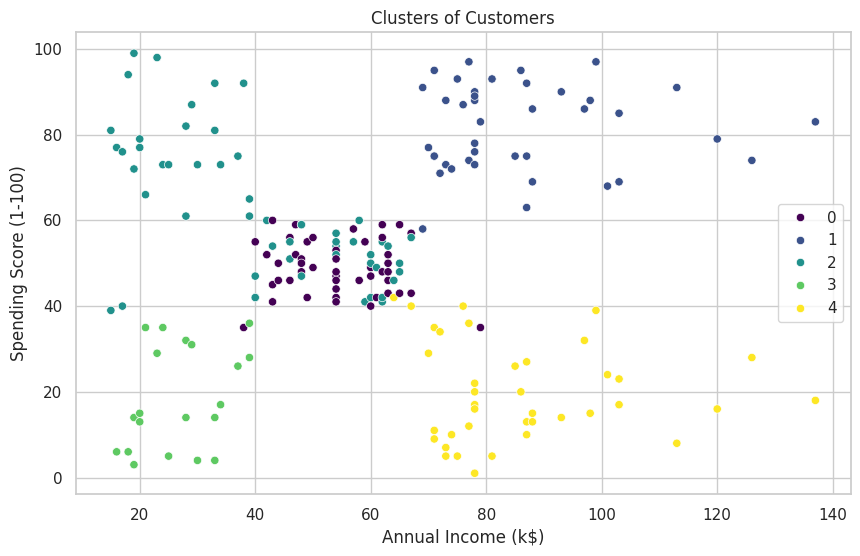

In [ ]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=customer_data, palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

**Analyze and Interpret the Clusters**

1. **Ensure the 'Cluster' column is included and not duplicated**:
   - `numeric_columns = customer_data.select_dtypes(include=[np.number]).columns.tolist()`: This line finds all the numeric columns in the customer data and creates a list of their names.
   - `if 'Cluster' not in numeric_columns: numeric_columns.append('Cluster')`: This line checks if the 'Cluster' column is already in the list of numeric columns. If it isn't, it adds the 'Cluster' column to the list. This ensures that we include the cluster information in our analysis.

2. **Analyze the characteristics of each cluster**:
   - `cluster_analysis = customer_data[numeric_columns].groupby('Cluster').mean()`: This line groups the data by the 'Cluster' column and calculates the average (mean) values for each numeric column within each cluster. It helps us understand the general characteristics of each cluster.
   - `print(cluster_analysis)`: This line prints the results of the cluster analysis, showing the average values for each numeric feature in each cluster.

3. **Detailed analysis of each cluster**:
   - `for cluster in range(kmeans.n_clusters):`: This line starts a loop that goes through each cluster, one at a time.
   - `print(f"\nCluster {cluster}:")`: This line prints the cluster number.
   - `cluster_data = customer_data[customer_data['Cluster'] == cluster]`: This line filters the customer data to include only the customers in the current cluster.
   - `print(cluster_data.describe())`: This line prints detailed statistics (like mean, standard deviation, minimum, and maximum) for each numeric feature within the current cluster. It helps us understand the specific details of each cluster.



In [23]:
# Ensure the 'Cluster' column is not duplicated and properly included
numeric_columns = customer_data.select_dtypes(include=[np.number]).columns.tolist()
if 'Cluster' not in numeric_columns:
    numeric_columns.append('Cluster')

# Analyze the cluster characteristics
cluster_analysis = customer_data[numeric_columns].groupby('Cluster').mean()
print(cluster_analysis)

# Detailed analysis of each cluster
for cluster in range(kmeans.n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_data = customer_data[customer_data['Cluster'] == cluster]
    print(cluster_data.describe())

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         83.872340  55.638298           54.382979               48.851064
1        161.025000  32.875000           86.100000               81.525000
2         55.648148  25.185185           41.092593               62.240741
3         24.100000  46.250000           26.750000               18.350000
4        159.743590  39.871795           86.102564               19.358974

Cluster 0:
       CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
count   47.000000  47.000000           47.000000               47.000000   
mean    83.872340  55.638298           54.382979               48.851064   
std     24.425234   8.913657            8.818344                6.303825   
min     41.000000  40.000000           38.000000               35.000000   
25%     64.500000  49.000000           47.500000               44.500000   
50%    

**More Vizualizations of the clusters**

<ipython-input-21-8a336b276047>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Age', data=customer_data, palette='viridis')


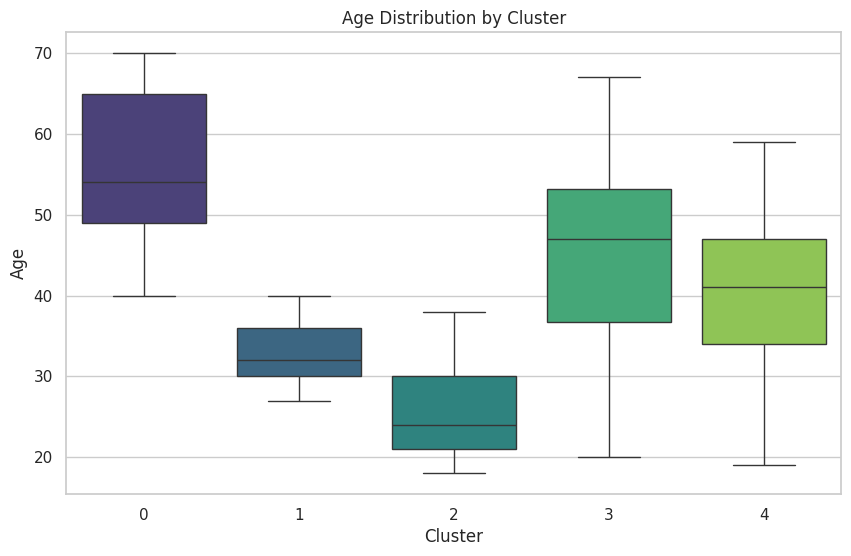

<ipython-input-21-8a336b276047>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Annual Income (k$)', data=customer_data, palette='viridis')


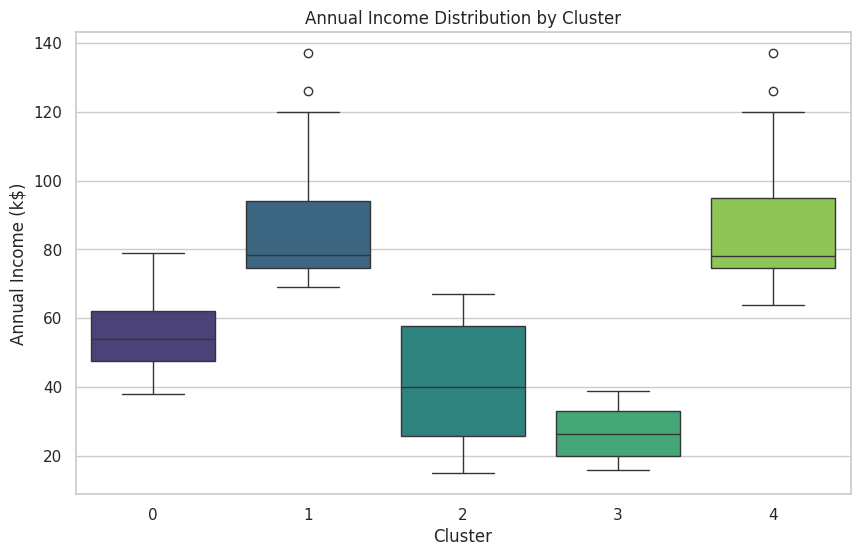

<ipython-input-21-8a336b276047>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=customer_data, palette='viridis')


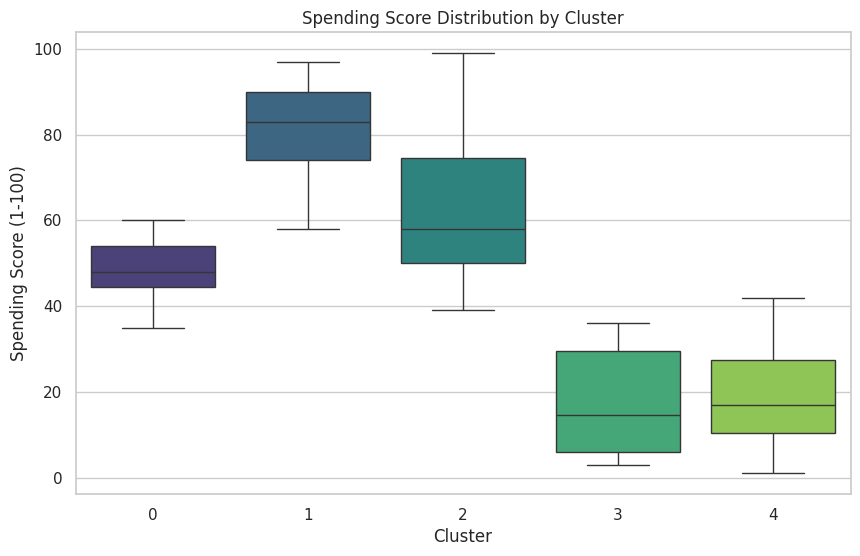

<ipython-input-21-8a336b276047>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=customer_data, palette='viridis')


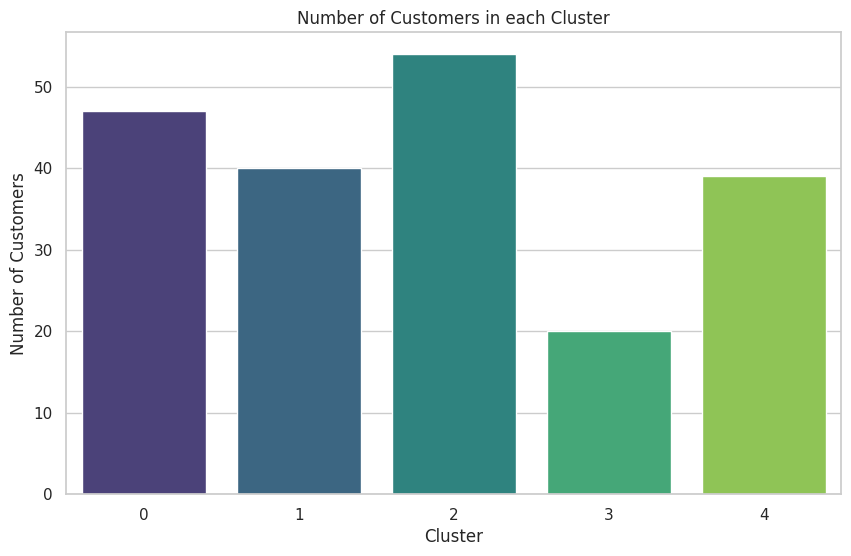

In [21]:
# Distribution of Age by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=customer_data, palette='viridis')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

# Distribution of Annual Income by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=customer_data, palette='viridis')
plt.title('Annual Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.show()

# Distribution of Spending Score by Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=customer_data, palette='viridis')
plt.title('Spending Score Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Count of Customers in each Cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=customer_data, palette='viridis')
plt.title('Number of Customers in each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


### Distribution of Age by Cluster
```python
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Age', data=customer_data, palette='viridis')
plt.title('Age Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()
```
**Explanation**:
- This code creates a box plot showing the distribution of ages for each cluster.
- **plt.figure(figsize=(10, 6))**: Sets the size of the plot.
- **sns.boxplot(x='Cluster', y='Age', data=customer_data, palette='viridis')**: Creates a box plot with clusters on the x-axis and age on the y-axis, using the 'viridis' color palette.
- **plt.title('Age Distribution by Cluster')**: Sets the title of the plot.
- **plt.xlabel('Cluster')**: Labels the x-axis as 'Cluster'.
- **plt.ylabel('Age')**: Labels the y-axis as 'Age'.
- **plt.show()**: Displays the plot.

### Distribution of Annual Income by Cluster
```python
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Annual Income (k$)', data=customer_data, palette='viridis')
plt.title('Annual Income Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.show()
```
**Explanation**:
- This code creates a box plot showing the distribution of annual income for each cluster.
- The syntax and steps are the same as above, but this time it plots 'Annual Income (k$)' on the y-axis.

### Distribution of Spending Score by Cluster
```python
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Spending Score (1-100)', data=customer_data, palette='viridis')
plt.title('Spending Score Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100)')
plt.show()
```
**Explanation**:
- This code creates a box plot showing the distribution of spending scores for each cluster.
- The syntax and steps are similar to the previous plots, but it plots 'Spending Score (1-100)' on the y-axis.

### Count of Customers in Each Cluster
```python
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=customer_data, palette='viridis')
plt.title('Number of Customers in each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()
```
**Explanation**:
- This code creates a count plot showing the number of customers in each cluster.
- **sns.countplot(x='Cluster', data=customer_data, palette='viridis')**: Creates a bar plot with clusters on the x-axis and the count of customers on the y-axis.
- The rest of the steps (setting the figure size, title, axis labels, and displaying the plot) follow the same pattern as the previous plots.



**Conclusion**

Through the customer segmentation analysis, we utilized K-means clustering to group customers into five distinct segments based on their age, annual income, and spending score. The Elbow method helped determine the optimal number of clusters. Visualizations, including scatter plots, pair plots, and box plots, revealed significant differences among the clusters. These insights enable targeted marketing strategies tailored to each group's specific behaviors and preferences.

We grouped customers into five segments using their age, income, and spending habits. Each group shows different characteristics, helping us understand them better and allowing for more effective, personalized marketing.

